# Getting Data

In [2]:
install.packages("osmdata")
install.packages("ggspatial")


The downloaded binary packages are in
	/var/folders/fc/z92zk78d4yng8j2rj9dmfldw0000gn/T//RtmpkppZIK/downloaded_packages

The downloaded binary packages are in
	/var/folders/fc/z92zk78d4yng8j2rj9dmfldw0000gn/T//RtmpkppZIK/downloaded_packages


Data (c) OpenStreetMap contributors, ODbL 1.0. https://www.openstreetmap.org/copyright



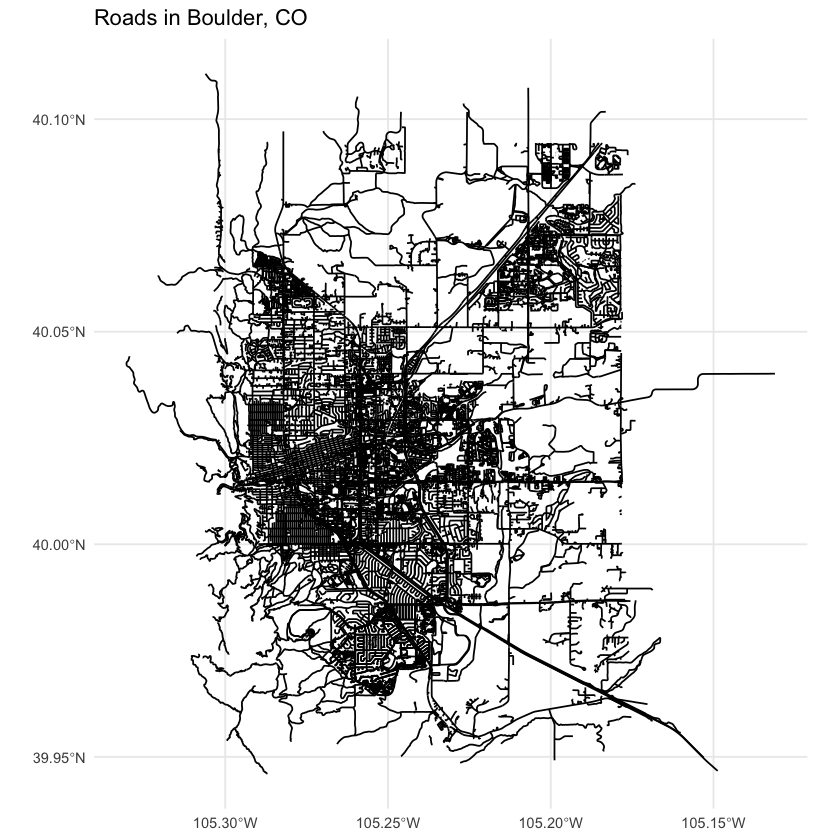

In [3]:
# Load necessary packages
library(osmdata)
library(magrittr)  # Load the magrittr package for piping
library(ggplot2)
library(ggspatial)

# Define the bounding box for Boulder, CO
bbox_boulder <- c(-105.3018, 39.9537, -105.1785, 40.0942)

# Download road data for Boulder
boulder_roads <- opq(bbox = bbox_boulder) %>%
    add_osm_feature(key = 'highway') %>%
    osmdata_sf()

# Plot the roads using ggplot2 and ggspatial
ggplot() +
    geom_sf(data = boulder_roads$osm_lines) +
    ggtitle("Roads in Boulder, CO") +
    theme_minimal()


In [4]:
# Load required packages
library(osmdata)
library(sf)
library(dplyr)

# Define the bounding box for the city of Boulder
bbox <- c(left = -105.3018, bottom = 39.9537, right = -105.1785, top = 40.0942)

# Fetch OpenStreetMap data
osm_data <- opq(bbox = bbox) %>% 
  add_osm_feature(key = "highway") %>% 
  osmdata_sf()

# Extract the road network
roads <- osm_data$osm_lines

# Calculate statistics for each street separately
street_stats <- roads %>%
  mutate(edge_length = st_length(geometry)) %>%
  select(osm_id, name, highway, maxspeed, oneway, length, lanes, edge_length)

print(street_stats)


Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




Simple feature collection with 19424 features and 8 fields
Geometry type: LINESTRING
Dimension:     XY
Bounding box:  xmin: -105.3303 ymin: 39.94605 xmax: -105.1311 ymax: 40.11068
Geodetic CRS:  WGS 84
First 10 features:
         osm_id             name      highway maxspeed oneway length lanes
4271726 4271726      30th Street     tertiary   20 mph    yes   <NA>     1
4279016 4279016 Table Mesa Court  residential   20 mph   <NA>   <NA>  <NA>
4280551 4280551    Stephens Road  residential   20 mph   <NA>   <NA>  <NA>
4325613 4325613 Innovation Drive unclassified   25 mph   <NA>   <NA>     3
4325623 4325623             <NA>      service   10 mph   <NA>   <NA>  <NA>
4360212 4360212  Colorado Avenue    secondary   35 mph    yes   <NA>  <NA>
4375030 4375030             <NA>         path     <NA>   <NA>   <NA>  <NA>
8017637 8017637    Holiday Drive  residential   20 mph     no   <NA>  <NA>
8017638 8017638     Zamia Avenue  residential   20 mph     no   <NA>  <NA>
8017639 8017639     Zamia Ave

In [5]:
write.csv(street_stats, "street_stats.csv", row.names = FALSE)


In [6]:
#can you read a geojson file in R?
# Load the sf package

library(sf)

# Read the GeoJSON file
geojson_data <- st_read("/Users/bhargavsrisainama/Documents/personal/CU Boulder Data Science/STAT 2/Final Project/road_infrastructure_data.geojson")

Reading layer `road_infrastructure_data' from data source 
  `/Users/bhargavsrisainama/Documents/personal/CU Boulder Data Science/STAT 2/Final Project/road_infrastructure_data.geojson' 
  using driver `GeoJSON'
Simple feature collection with 5319 features and 6 fields
Geometry type: LINESTRING
Dimension:     XY
Bounding box:  xmin: -122.5137 ymin: 37.70832 xmax: -122.3498 ymax: 37.81919
Geodetic CRS:  WGS 84


In [7]:
geojson_data

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called 'geojsonio'

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_geojson.sf(obj)
8. repr_geojson(geo

u,v,key,lanes,maxspeed,highway,geometry
<dbl>,<dbl>,<int>,<int>,<int>,<list>,<LINESTRING [arc_degree]>
32927563,4377020523,0,5,50,motorway,LINESTRING (-122.391 37.785...
32927591,6469349533,0,4,65,motorway,LINESTRING (-122.4241 37.73...
32927645,65331336,0,2,65,motorway,LINESTRING (-122.4133 37.73...
32927645,766946830,0,2,50,motorway_link,LINESTRING (-122.4133 37.73...
33241803,8865870141,0,2,30,primary,LINESTRING (-122.4035 37.80...
54891208,293818036,0,2,25,tertiary,LINESTRING (-122.3912 37.77...
54891446,302034219,0,2,30,primary,LINESTRING (-122.3894 37.77...
65279897,65280284,0,2,40,tertiary,LINESTRING (-122.3916 37.71...
65279897,65280289,0,2,40,tertiary,LINESTRING (-122.3916 37.71...


In [9]:
# If geojson_data is a list of data frames
for(i in seq_along(geojson_data)) {
  write.csv(geojson_data[[i]], paste0("geojson_data", i, ".csv"), row.names = FALSE)
}


In [16]:
library(osmdata)
library(dplyr)

# Define the location of interest
location <- "Boulder County, Colorado, USA"

# Download the traffic signs data for the location
query <- opq(bbox = location) %>%
  add_osm_feature(key = 'traffic_sign')

osm_data <- osmdata_sf(query)

# Extract the traffic signs data
traffic_signs <- osm_data$osm_points %>%
  filter(!is.na(traffic_sign))

# Print the traffic signs data
print(traffic_signs)

#save it as traffic signs csv
write.csv(traffic_signs, "traffic_signs.csv", row.names = FALSE)

Simple feature collection with 522 features and 17 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -105.5357 ymin: 39.91406 xmax: -105.0535 ymax: 40.25695
Geodetic CRS:  WGS 84
First 10 features:
               osm_id name          contents direction highway lamp_mount lamps
1818168034 1818168034 <NA>              <NA>      <NA>    <NA>       <NA>  <NA>
1818168132 1818168132 <NA>              <NA>      <NA>    <NA>       <NA>  <NA>
1818180589 1818180589 <NA> Trailhead Parking      <NA>    <NA>       <NA>  <NA>
1819698798 1819698798 <NA>              <NA>       350    <NA>       <NA>  <NA>
1819698853 1819698853 <NA>              <NA>       330    <NA>       <NA>  <NA>
1819698859 1819698859 <NA>              <NA>       170    <NA>       <NA>  <NA>
1819698993 1819698993 <NA>              <NA>       300    <NA>       <NA>  <NA>
1819699002 1819699002 <NA>              <NA>       170    <NA>       <NA>  <NA>
1819699031 1819699031 <NA>              <NA>      <NA>    <NA>   

In [13]:
crashes = read.csv("/Users/bhargavsrisainama/Documents/personal/CU Boulder Data Science/STAT 2/Final Project/crashes.csv")

In [15]:
head(crashes)

,X...X,Y,OBJECTID,Road_System,Route_Num,Route_Section,Milepost,Date_Time,Time_of_Day,City,...,Impairment_Involved,Helmet_Involved,Corridor_1,Corridor_2,Serial_No,GlobalID,created_user,created_date,last_edited_user,last_edited_date
,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,-105.1279,39.98213,765745,State Highway,42,A,2.350,2021/11/24 11:00:00+00,1100,LOUISVILLE,...,,,,,187892,{612C0F14-9748-4911-BCFD-4FA8046B12E8},TRANSPORTATION,2024/04/24 11:42:09+00,TRANSPORTATION,2024/04/24 11:42:09+00
2,-105.2753,40.01664,765746,State Highway,7,B,49.720,2021/12/03 13:54:00+00,1354,BOULDER,...,,,,,189360,{C99A9013-4120-44E2-88FA-478C4E0E4153},TRANSPORTATION,2024/04/24 11:42:09+00,TRANSPORTATION,2024/04/24 11:42:09+00
3,-105.2741,40.01690,765747,State Highway,7,B,49.790,2021/09/27 00:00:00+00,0,BOULDER,...,,,,,171464,{B886A9CA-155F-40E5-BEB4-0A4FF26BC8EA},TRANSPORTATION,2024/04/24 11:42:09+00,TRANSPORTATION,2024/04/24 11:42:09+00
4,-105.1023,40.18846,765748,State Highway,287,C,317.350,2021/08/16 14:28:00+00,1428,LONGMONT,...,,,,,156397,{0C935B1F-B547-4ED1-8B1C-A81FCAAD1233},TRANSPORTATION,2024/04/24 11:42:09+00,TRANSPORTATION,2024/04/24 11:42:09+00
5,-105.1023,40.18846,765749,State Highway,287,C,317.350,2021/10/24 23:50:00+00,2350,LONGMONT,...,Impairment,,,,179870,{E5510811-0668-4C85-B3E7-F34C8B393806},TRANSPORTATION,2024/04/24 11:42:09+00,TRANSPORTATION,2024/04/24 11:42:09+00
6,-105.1023,40.18856,765750,State Highway,287,C,317.357,2021/12/07 14:40:00+00,1440,LONGMONT,...,,,,,191420,{2F9C7429-4BF7-4737-8F94-B1C05E902CD7},TRANSPORTATION,2024/04/24 11:42:09+00,TRANSPORTATION,2024/04/24 11:42:09+00


# Preprocessing

In [24]:
traffic_signs = read.csv("/Users/bhargavsrisainama/Documents/personal/CU Boulder Data Science/STAT 2/Final Project/traffic_signs.csv")
crashes = read.csv("/Users/bhargavsrisainama/Documents/personal/CU Boulder Data Science/STAT 2/Final Project/Crashes.csv")

In [25]:
head(traffic_signs)

,osm_id,name,contents,direction,highway,lamp_mount,lamps,mapillary,material,maxspeed,maxspeed.advisory,power,source,source.maxspeed,support,survey.date,traffic_sign,geometry
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1818168034,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,maxspeed,c(-105.524771,40.190198)
1818168132,NA,NA,NA,NA,NA,NA,NA,NA,20 mph,NA,NA,NA,NA,NA,NA,maxspeed,c(-105.5305855,40.1947149)
1818180589,NA,Trailhead Parking,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,yes,c(-105.533433,40.1738359)
1819698798,NA,NA,350,NA,NA,NA,NA,NA,40 mph,NA,NA,survey,NA,NA,NA,maxspeed,c(-105.5301909,40.1983259)
1819698853,NA,NA,330,NA,NA,NA,NA,NA,55 mph,NA,NA,survey,NA,NA,NA,maxspeed,c(-105.5222388,40.2094279)
1819698859,NA,NA,170,NA,NA,NA,NA,NA,55 mph,NA,NA,NA,NA,NA,NA,maxspeed,c(-105.5236012,40.2112895)


In [26]:
#lets remove columns name,contents,direction,highway, lamp_mount,lamps, mappilary, material , maxspeed:advisory, power, source, source:maxspeed, support, survery:date

#convert traffic_signs to a df
traffic_signs = as.data.frame(traffic_signs)

# Load necessary library
library(dplyr)

# Assuming df is your data frame
traffic_signs <- traffic_signs %>%
  select(-c("name", "contents", "direction", "highway", "lamp_mount", "lamps", "mapillary", "maxspeed", "maxspeed.advisory", "power", "source", "source.maxspeed", "support"))


In [27]:
head(traffic_signs)

,osm_id,material,survey.date,traffic_sign,geometry
,<chr>,<chr>,<chr>,<chr>,<chr>
1818168034,NA,NA,maxspeed,c(-105.524771,40.190198)
1818168132,NA,20 mph,maxspeed,c(-105.5305855,40.1947149)
1818180589,NA,NA,yes,c(-105.533433,40.1738359)
1819698798,NA,40 mph,maxspeed,c(-105.5301909,40.1983259)
1819698853,NA,55 mph,maxspeed,c(-105.5222388,40.2094279)
1819698859,NA,55 mph,maxspeed,c(-105.5236012,40.2112895)


In [28]:
#rename the column names to be osm_id,maxspeed,traffic_sign, lattitude, longitude

colnames(traffic_signs) <- c("osm_id", "maxspeed", "traffic_sign", "latitude", "longitude")

In [29]:
head(traffic_signs)

,osm_id,maxspeed,traffic_sign,latitude,longitude
,<chr>,<chr>,<chr>,<chr>,<chr>
1818168034,NA,NA,maxspeed,c(-105.524771,40.190198)
1818168132,NA,20 mph,maxspeed,c(-105.5305855,40.1947149)
1818180589,NA,NA,yes,c(-105.533433,40.1738359)
1819698798,NA,40 mph,maxspeed,c(-105.5301909,40.1983259)
1819698853,NA,55 mph,maxspeed,c(-105.5222388,40.2094279)
1819698859,NA,55 mph,maxspeed,c(-105.5236012,40.2112895)


In [30]:
#lets remove the NA values from maxspeed
traffic_signs = traffic_signs[!is.na(traffic_signs$maxspeed),]


In [31]:
head(traffic_signs)

,osm_id,maxspeed,traffic_sign,latitude,longitude
,<chr>,<chr>,<chr>,<chr>,<chr>
1818168132,NA,20 mph,maxspeed,c(-105.5305855,40.1947149)
1819698798,NA,40 mph,maxspeed,c(-105.5301909,40.1983259)
1819698853,NA,55 mph,maxspeed,c(-105.5222388,40.2094279)
1819698859,NA,55 mph,maxspeed,c(-105.5236012,40.2112895)
1819698993,NA,40 mph,maxspeed,c(-105.5288641,40.2276472)
1819699002,NA,40 mph,maxspeed,c(-105.5312961,40.2318125)


In [32]:
#lets remove osm_id column
traffic_signs = traffic_signs[,-1]


In [33]:
#lets remove the first 2 characters from latitude and the las 1 character from longitude
traffic_signs$latitude = substr(traffic_signs$latitude, 3, nchar(traffic_signs$latitude))
traffic_signs$longitude = substr(traffic_signs$longitude, 1, nchar(traffic_signs$longitude)-1)


In [34]:
head(traffic_signs)

,maxspeed,traffic_sign,latitude,longitude
,<chr>,<chr>,<chr>,<chr>
1818168132,20 mph,maxspeed,-105.5305855,40.1947149
1819698798,40 mph,maxspeed,-105.5301909,40.1983259
1819698853,55 mph,maxspeed,-105.5222388,40.2094279
1819698859,55 mph,maxspeed,-105.5236012,40.2112895
1819698993,40 mph,maxspeed,-105.5288641,40.2276472
1819699002,40 mph,maxspeed,-105.5312961,40.2318125


In [39]:
#save it as a new file named cleaned_traffic_signs.csv

write.csv(traffic_signs, "cleaned_traffic_signs.csv", row.names = FALSE)

In [35]:
head(crashes)

,X...X,Y,OBJECTID,Road_System,Route_Num,Route_Section,Milepost,Date_Time,Time_of_Day,City,...,Impairment_Involved,Helmet_Involved,Corridor_1,Corridor_2,Serial_No,GlobalID,created_user,created_date,last_edited_user,last_edited_date
,<dbl>,<dbl>,<int>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,-105.1279,39.98213,765745,State Highway,42,A,2.350,2021/11/24 11:00:00+00,1100,LOUISVILLE,...,,,,,187892,{612C0F14-9748-4911-BCFD-4FA8046B12E8},TRANSPORTATION,2024/04/24 11:42:09+00,TRANSPORTATION,2024/04/24 11:42:09+00
2,-105.2753,40.01664,765746,State Highway,7,B,49.720,2021/12/03 13:54:00+00,1354,BOULDER,...,,,,,189360,{C99A9013-4120-44E2-88FA-478C4E0E4153},TRANSPORTATION,2024/04/24 11:42:09+00,TRANSPORTATION,2024/04/24 11:42:09+00
3,-105.2741,40.01690,765747,State Highway,7,B,49.790,2021/09/27 00:00:00+00,0,BOULDER,...,,,,,171464,{B886A9CA-155F-40E5-BEB4-0A4FF26BC8EA},TRANSPORTATION,2024/04/24 11:42:09+00,TRANSPORTATION,2024/04/24 11:42:09+00
4,-105.1023,40.18846,765748,State Highway,287,C,317.350,2021/08/16 14:28:00+00,1428,LONGMONT,...,,,,,156397,{0C935B1F-B547-4ED1-8B1C-A81FCAAD1233},TRANSPORTATION,2024/04/24 11:42:09+00,TRANSPORTATION,2024/04/24 11:42:09+00
5,-105.1023,40.18846,765749,State Highway,287,C,317.350,2021/10/24 23:50:00+00,2350,LONGMONT,...,Impairment,,,,179870,{E5510811-0668-4C85-B3E7-F34C8B393806},TRANSPORTATION,2024/04/24 11:42:09+00,TRANSPORTATION,2024/04/24 11:42:09+00
6,-105.1023,40.18856,765750,State Highway,287,C,317.357,2021/12/07 14:40:00+00,1440,LONGMONT,...,,,,,191420,{2F9C7429-4BF7-4737-8F94-B1C05E902CD7},TRANSPORTATION,2024/04/24 11:42:09+00,TRANSPORTATION,2024/04/24 11:42:09+00


In [37]:
#remove specific number columns

crashes = as.data.frame(crashes)

columns_to_remove <- c("X...X", "Y", "OBJECTID", "Route_Num", "Route_Section", "Milepost", "Date_Time", "Time_of_Day", "County", "Location_1", "Location_Link", "Location_2", "Unique_Crash_ID", "Intersection_ID", "Uninjured", "Level_C_Injuries", "Level_B_Injuries", "Level_A_Injuries", "Fatalities", "Agency_Name", "Report_Id", "Crash_Location", "Road_Description", "Vehicles", "Road_Contour", "Road_Cond", "Lighting_Cond", "Weather", "Limit1", "Limit2", "Limit3", "Ramp_Id", "Crash_Type", "Fixed_Object", "Event1", "Event2", "Event3", "Mhe", "Animal_Species", "Veh1_Dir", "Veh1_Type", "Driver1_Cond", "Veh1_Human_Contr_Factor", "Veh1_Speed", "Veh1_Movement", "Driver1_State", "Veh1_HAZMAT", "Driver1_Belt", "Veh1_Cycle_Prot", "Driver1_Inj_Level", "Veh2_Dir", "Veh2_Type", "Driver2_Cond", "Veh2_Human_Contr_Factor", "Veh2_Speed", "Veh2_Movement", "Driver2_State", "Veh2_HAZMAT", "Driver2_Belt", "Veh2_Cycle_Prot", "Driver2_Inj_Level", "Veh3_Dir", "Veh3_Type", "Driver3_Cond", "Veh3_Human_Contr_Factor", "Veh3_Speed", "Veh3_Movement", "Driver3_State", "Veh3_HAZMAT", "Driver3_Belt", "Veh3_Cycle_Prot", "Driver3_Inj_Level", "Sum_of_Minor_and_Severe", "Sum_of_Severe", "Bicycle_Involved", "Pedestrian_Involved", "Motorcycle_Involved", "Impairment_Involved", "Helmet_Involved", "Corridor_1", "Corridor_2", "Serial_No", "GlobalID", "created_user", "created_date", "last_edited_user", "last_edited_date")

# Remove the columns from the data frame
crashes <- crashes %>%
  select(-columns_to_remove)

In [38]:
head(crashes)

,Road_System,City,Latitude,Longitude,Severity
,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,State Highway,LOUISVILLE,39.98001,-105.1200,No Injury (PDO)
2,State Highway,BOULDER,40.01665,-105.2754,Possible/Complaint of Injury (C
3,State Highway,BOULDER,40.01691,-105.2741,No Injury (PDO)
4,State Highway,LONGMONT,40.18847,-105.1023,No Injury (PDO)
5,State Highway,LONGMONT,40.18847,-105.1023,No Injury (PDO)
6,State Highway,LONGMONT,40.18857,-105.1023,"Evident, Incapacitating (A)"


In [40]:
#save it as a new file named cleaned_crashes.csv

write.csv(crashes, "cleaned_crashes.csv", row.names = FALSE)

In [46]:
#find the shape of traffic_signs and crashes

dim(traffic_signs)


[1] 411   4

In [47]:
dim(crashes)

[1] 4558    5

In [ ]:
# Load necessary libraries
library(dplyr)
library(geosphere)

# Read the data
crashes <- read.csv("/Users/bhargavsrisainama/Documents/personal/CU Boulder Data Science/STAT 2/Final Project/cleaned_crashes.csv")
traffic_signs <- read.csv("/Users/bhargavsrisainama/Documents/personal/CU Boulder Data Science/STAT 2/Final Project/cleaned_traffic_signs.csv")

# Check for non-numeric values in the Longitude_Crash column
non_numeric <- crashes$Longitude_Crash[!grepl("^[-+]?[0-9]*\\.?[0-9]+([eE][-+]?[0-9]+)?$", crashes$Longitude_Crash)]
print(non_numeric)

# Handle non-numeric values (replace with NA in this example)
crashes$Longitude_Crash[!grepl("^[-+]?[0-9]*\\.?[0-9]+([eE][-+]?[0-9]+)?$", crashes$Longitude_Crash)] <- NA

# Convert the column to numeric
crashes$Longitude_Crash <- as.numeric(as.character(crashes$Longitude_Crash))
# Repeat the process for the other columns
crashes$Latitude_Crash <- as.numeric(as.character(crashes$Latitude_Crash))
traffic_signs$Longitude_Traffic_Sign <- as.numeric(as.character(traffic_signs$Longitude_Traffic_Sign))
traffic_signs$Latitude_Traffic_Sign <- as.numeric(as.character(traffic_signs$Latitude_Traffic_Sign))

# Function to find the nearest traffic sign for each crash
get_nearest_sign <- function(long_crash, lat_crash) {
  distances <- distHaversine(matrix(c(long_crash, lat_crash), nrow = 1),
                             traffic_signs[, c("Longitude_Traffic_Sign", "Latitude_Traffic_Sign")])
  index_min <- which.min(distances)
  return(cbind(distances[index_min], traffic_signs[index_min, ]))
}

# Apply function to each row in crashes dataframe
nearest_sign_data <- apply(crashes[, c("Longitude_Crash", "Latitude_Crash")], 1, function(x) {
  get_nearest_sign(x[1], x[2])
})

# Create a dataframe from the list and bind to crashes dataframe
nearest_sign_df <- do.call(rbind, nearest_sign_data)
colnames(nearest_sign_df) <- c("Nearest_Traffic_Sign_Distance", "Longitude_Traffic_Sign", "Latitude_Traffic_Sign", "Maxspeed")

# Combine data
final_data <- cbind(crashes, nearest_sign_df)

# Select and potentially rename columns for clarity
final_output <- final_data %>%
  select(Road_System, City, Longitude_Crash, Latitude_Crash, Severity,
         Nearest_Traffic_Sign_Distance, Nearest_Traffic_Sign_Latitude = Latitude_Traffic_Sign,
         Nearest_Traffic_Sign_Longitude = Longitude_Traffic_Sign, Nearest_Traffic_Sign_Maxspeed = Maxspeed)

#save it as a csv file

write.csv("Final_Crashes_Traffic_Signs_Dataset.csv")